### Importando pacotes

In [5]:
import os
import datetime
from google.colab import output, runtime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# validando se estamos usando o ambiente de GPU

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("Using GPU:", gpus[0])
    except RuntimeError as e:
        print(e)
else:
    print("No GPU detected.")

Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [6]:
# limpando/removendo a pasta de "sample_data"

!rm -rf sample_data

# clonando repositorio e apontando para a pasta do repo

!git clone https://github.com/lpoggetto/trabalho_final_DL_fiap

!cd trabalho_final_DL_fiap

fatal: destination path 'trabalho_final_DL_fiap' already exists and is not an empty directory.


### BBAS3.SA 🤑

In [4]:
# importando os dados que serao utilizados no modelo

df_bbas3_treino = pd.read_csv('/content/trabalho_final_DL_fiap/BBAS3.SA/treino.csv',
                              usecols=lambda column: 'Unnamed' not in column) # Desconsiderando coluna "unnamed"
df_bbas3_teste = pd.read_csv('/content/trabalho_final_DL_fiap/BBAS3.SA/teste.csv',
                             usecols=lambda column: 'Unnamed' not in column) # Desconsiderando coluna "unnamed"

In [7]:
# validacao dos campos - treino

df_bbas3_treino.head()

,Date,Close,Smoothed_Close,Label,Past_1_Days_Close,Past_2_Days_Close,Past_3_Days_Close,Past_4_Days_Close,Past_5_Days_Close,Past_6_Days_Close,Past_7_Days_Close,Past_8_Days_Close,Past_9_Days_Close,Past_10_Days_Close,Past_11_Days_Close,Past_12_Days_Close,Past_13_Days_Close,Past_14_Days_Close,Past_15_Days_Close
0,2000-01-24,1.062769,1.071645,-1,1.088979,1.079805,1.086357,1.098152,1.069322,1.061459,1.062769,1.081116,1.066701,1.081116,1.024767,1.048355,1.033940,1.023457,1.074564
1,2000-01-26,1.087668,1.073247,-1,1.062769,1.088979,1.079805,1.086357,1.098152,1.069322,1.061459,1.062769,1.081116,1.066701,1.081116,1.024767,1.048355,1.033940,1.023457
2,2000-01-27,1.064080,1.072330,-1,1.087668,1.062769,1.088979,1.079805,1.086357,1.098152,1.069322,1.061459,1.062769,1.081116,1.066701,1.081116,1.024767,1.048355,1.033940
3,2000-01-28,1.036561,1.068753,-1,1.064080,1.087668,1.062769,1.088979,1.079805,1.086357,1.098152,1.069322,1.061459,1.062769,1.081116,1.066701,1.081116,1.024767,1.048355
4,2000-01-31,1.035250,1.065403,-1,1.036561,1.064080,1.087668,1.062769,1.088979,1.079805,1.086357,1.098152,1.069322,1.061459,1.062769,1.081116,1.066701,1.081116,1.024767


In [8]:
# validacao dos campos - teste

df_bbas3_teste.head()

,Date,Close,Smoothed_Close,Label,Past_1_Days_Close,Past_2_Days_Close,Past_3_Days_Close,Past_4_Days_Close,Past_5_Days_Close,Past_6_Days_Close,Past_7_Days_Close,Past_8_Days_Close,Past_9_Days_Close,Past_10_Days_Close,Past_11_Days_Close,Past_12_Days_Close,Past_13_Days_Close,Past_14_Days_Close,Past_15_Days_Close
0,2019-03-26,36.386158,37.917648,-1,35.549099,35.297241,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129
1,2019-03-27,34.371300,37.563014,-1,36.386158,35.549099,35.297241,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866
2,2019-03-28,35.571316,37.363844,-1,34.371300,36.386158,35.549099,35.297241,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150
3,2019-03-29,36.089863,37.236446,-1,35.571316,34.371300,36.386158,35.549099,35.297241,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489
4,2019-04-01,36.445412,37.157342,-1,36.089863,35.571316,34.371300,36.386158,35.549099,35.297241,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267


In [29]:
# validando tamanho dos datasets
print('treino: ', df_bbas3_treino.shape)
print('teste: ', df_bbas3_teste.shape)

treino:  (4735, 19)
teste:  (1185, 19)


In [30]:
df_bbas3_teste.columns

Index(['Date', 'Close', 'Smoothed_Close', 'Label', 'Past_1_Days_Close',
       'Past_2_Days_Close', 'Past_3_Days_Close', 'Past_4_Days_Close',
       'Past_5_Days_Close', 'Past_6_Days_Close', 'Past_7_Days_Close',
       'Past_8_Days_Close', 'Past_9_Days_Close', 'Past_10_Days_Close',
       'Past_11_Days_Close', 'Past_12_Days_Close', 'Past_13_Days_Close',
       'Past_14_Days_Close', 'Past_15_Days_Close'],
      dtype='object')

<Figure size 1500x800 with 0 Axes>

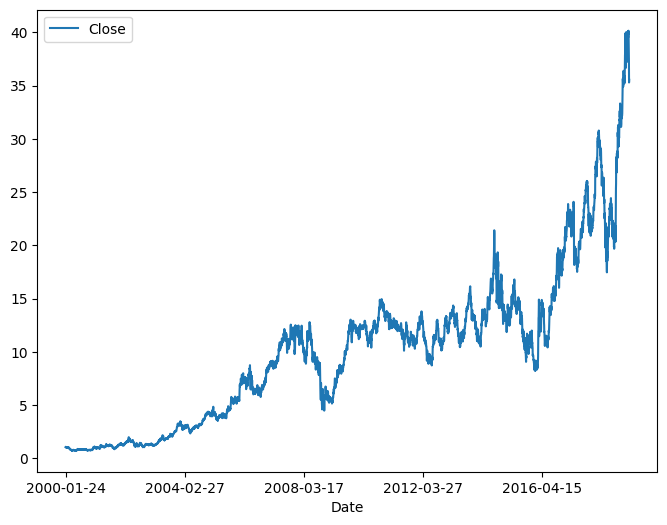

In [25]:
colunas_plot = [
    'Close'
    # 'Past_1_Days_Close',
    # 'Past_2_Days_Close',
    # 'Past_3_Days_Close',
    # 'Past_4_Days_Close',
    # 'Past_5_Days_Close',
    # 'Past_6_Days_Close',
    # 'Past_7_Days_Close',
    # 'Past_8_Days_Close',
    # 'Past_9_Days_Close',
    # 'Past_10_Days_Close',
    # 'Past_11_Days_Close',
    # 'Past_12_Days_Close',
    # 'Past_13_Days_Close',
    # 'Past_14_Days_Close',
    # 'Past_15_Days_Close',
]

# plotting features and changing size of graphs
plt.figure(figsize=(15, 8))
plot_features = df_bbas3_treino[colunas_plot]
plot_features.index = df_bbas3_treino['Date']
_ = plot_features.plot(subplots=True)